<a href="https://colab.research.google.com/github/johnberg1/MusicGenrePredictor/blob/master/ML_Project_V1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Mounting Google Drive, only needed once
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# Helper function for removing unnecessary characters
def getgenres(temp):
    temp = temp.replace("[","")
    temp = temp.replace(",","")
    temp = temp.replace("]","")
    lis = list(map(int,temp.split(" ")))
    arr = np.asarray(lis)
    return arr

In [0]:
#Uploading the arrays into local variables, only needed once
import pandas as pd
import numpy as np

df = pd.read_csv('/content/drive/My Drive/ML PROJECT/genresV1.csv')
genres = df.to_numpy()   #to convert pandas dataframe to 2d numpy array
df = pd.read_csv('/content/drive/My Drive/ML PROJECT/features.csv',header=None )
features = df.to_numpy()   #to convert pandas dataframe to 2d numpy array

#fixing issue with geners data format
temp = []

for i in range(np.size(genres,0)):
  temp.append(genres[i][0])
temp = np.asarray(temp)

genres2 = []
features2= []

c = 0
for i in temp:
  if( i != '[]' and i != 'nan' and i != 'Jarrod Fowler' and i != ' John Butcher' and (i[0:5] != "['zal") ):
    genres2.append(getgenres(i))
    features2.append( features[c])
  c +=1

genres2 = np.asarray(genres2)
features2 = np.asarray(features2)

df = pd.read_csv('/content/drive/My Drive/ML PROJECT/genres.csv')
genrelist = df.to_numpy()   #to convert pandas dataframe to 2d numpy array
temp1 = np.transpose(genrelist)[0]#all genres
temp2 = np.transpose(genrelist)[4] #parent genres, if 0 -> it is already a parent
genrelist = np.transpose(np.vstack((temp1,temp2))) #we only need these 2 at this point



In [0]:
genresSingle = []
featuresSingle = [] 
for (i,j) in zip(genres2,features2):
  for k in i:
    genresSingle.append(k)
    featuresSingle.append(j)
genresSingle = np.asarray(genresSingle)
featuresSingle = np.asarray(featuresSingle)

In [0]:
# Maps each genre to their top genres and treats them as separate songs
genresSingleTop = []
featuresSingleTop = [] 
for (i,j) in zip(genres2,features2):
  for k in i:
    t = temp2[np.where(temp1 == k)]
    genresSingleTop.append(t[0])
    featuresSingleTop.append(j)
genresSingleTop = np.asarray(genresSingleTop)
featuresSingleTop = np.asarray(featuresSingleTop)

In [0]:
genresSingleTop2 = []
featuresSingleTop2 = [] 
for (i,j) in zip(genres2,features2):
  xyt = []
  for k in i:
    t = temp2[np.where(temp1 == k)]
    if t[0] not in xyt:
      xyt.append(t[0])

      genresSingleTop2.append(t[0])
      featuresSingleTop2.append(j)
genresSingleTop2 = np.asarray(genresSingleTop2)
featuresSingleTop2 = np.asarray(featuresSingleTop2)

In [0]:
xy = genres2[-3]
xyt = []
print(xy)
for j in xy:
  xyz = np.where(temp1 == j)
  print(xyz)
  xyt.append(temp2[xyz[0][0]])
print (type(xyt))
print(max(set(xyt), key = xyt.count))

[12 32 66]
(array([11]),)
(array([27]),)
(array([44]),)
<class 'list'>
12


In [0]:
#fatbardh
from operator import itemgetter

countGenres = np.zeros(1236)
for i in range(81553):
  for j in genres2[i]:
    countGenres[j] += 1

graphData = []
for i in range(1236):
  if(countGenres[i] != 0.0):
    graphData.append( [i , int(countGenres[i])])

a = sorted(graphData, key=lambda x: x[1], reverse=True)
print(len( graphData))
for i in range(15):
  print(a[i])

In [0]:
print(genres2)

In [0]:
genresSingleTop = []
featuresSingleTop = [] 
for (i,j) in zip(genres2,features2):
    t = temp2[np.where(temp1 == i)]
  for k in i:
    genresSingleTop.append(t[0])
    featuresSingleTop.append(j)
genresSingleTop = np.asarray(genresSingleTop)
featuresSingleTop = np.asarray(featuresSingleTop)

In [0]:
#Sanity check for sizes. The last to should be (191292,518) and (191292,)
print("Geners.shape")
print( genres2.shape)
print("Features List shape.")
print(features2.shape)
print("GenreList Shape")
print( genrelist.shape)


print("Feature Matrix Shape:")
print(featuresSingleTop.shape)
print("Genres Vector Shape:")
print(genresSingleTop.shape)

Geners.shape
(81553,)
Features List shape.
(81553, 518)
GenreList Shape
(163, 2)
Feature Matrix Shape:
(191292, 518)
Genres Vector Shape:
(191292,)


In [0]:
##### ANN PART #####
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler
import keras

import warnings
warnings.filterwarnings('ignore')

from keras import models
from keras import layers

# Get the features and genres after processing
featuresTrial = featuresSingleTop
genresTrial = genresSingleTop

# Encoding each label so they have values from 1 to 16
encoder = LabelEncoder()
y = encoder.fit_transform(genresTrial)

# Standardizing the data
scaler = StandardScaler()
X = scaler.fit_transform(np.array(featuresTrial, dtype = float))

# 0.8 training 0.2 test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Defining model parameters
model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(X_train.shape[1],)))

model.add(layers.Dense(256, activation='relu'))

model.add(layers.Dense(128, activation='relu'))

model.add(layers.Dense(64, activation='relu'))

model.add(layers.Dense(32, activation='relu'))

model.add(layers.Dense(16, activation='softmax'))

# Running and fitting our model
model.compile(optimizer='nadam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


history = model.fit(X_train,
                    y_train,
                    epochs=150,
                    batch_size=1024)
            

Epoch 1/150
153033/153033 [==============================] - 1s 9us/step - loss: 2.1387 - acc: 0.2493
Epoch 2/150
153033/153033 [==============================] - 1s 7us/step - loss: 2.0784 - acc: 0.2676
Epoch 3/150
153033/153033 [==============================] - 1s 7us/step - loss: 2.0510 - acc: 0.2819
Epoch 4/150
153033/153033 [==============================] - 1s 7us/step - loss: 2.0174 - acc: 0.3004
Epoch 5/150
153033/153033 [==============================] - 1s 7us/step - loss: 1.9762 - acc: 0.3202
Epoch 6/150
153033/153033 [==============================] - 1s 7us/step - loss: 1.9278 - acc: 0.3424
Epoch 7/150
153033/153033 [==============================] - 1s 7us/step - loss: 1.8694 - acc: 0.3657
Epoch 8/150
153033/153033 [==============================] - 1s 7us/step - loss: 1.8112 - acc: 0.3886
Epoch 9/150
153033/153033 [==============================] - 1s 7us/step - loss: 1.7540 - acc: 0.4103
Epoch 10/150
153033/153033 [==============================] - 1s 7us/step - loss: 

In [0]:
# Compute top1 and top3 accuracies
top1 = 0.0
top3 = 0.0    
class_probs = model.predict(X_test)
for i, l in enumerate(y_test):
    class_prob = class_probs[i]
    top_values = (-class_prob).argsort()[:3]
    if top_values[0] == l:
        top1 += 1.0
    if np.isin(np.array([l]), top_values):
        top3 += 1.0

print("top1 acc", top1/len(y_test))
print("top3 acc", top3/len(y_test))

top1 acc 0.37120677487649967
top3 acc 0.6535717086175802


Text(0.5, 1.0, 'Training Loss vs epoch #')

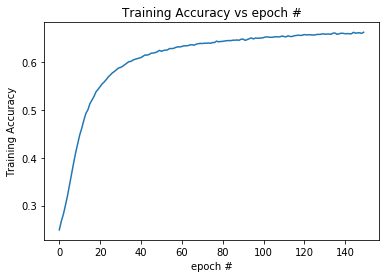

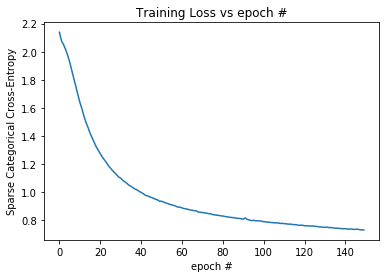

In [0]:
# Plotting the loss and accuracy
import matplotlib.pyplot as plt
plt.plot(history.history['acc'])
plt.xlabel('epoch #')
plt.ylabel('Training Accuracy')
plt.title('Training Accuracy vs epoch #')
plt.figure()
plt.plot(history.history['loss'])
plt.xlabel('epoch #')
plt.ylabel('Sparse Categorical Cross-Entropy')
plt.title('Training Loss vs epoch #')

In [0]:
!pip install torch

     |████████████████████████████████| 734.6MB 24kB/s 


In [0]:
##### CNN PART #####
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn import preprocessing

# Get the features and genres after processing
featuresTrial = featuresSingleTop
genresTrial = genresSingleTop

# Encoding each label so they have values from 1 to 16
encoder = LabelEncoder()
y = encoder.fit_transform(genresTrial)

# Standardizing the data
scaler = StandardScaler()
X = scaler.fit_transform(np.array(featuresTrial, dtype = float))

# 0.6 train 0.2 validation 0.2 test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

In [0]:
# Adding dimension for compatibility
X_train = X_train[: ,None, :]
X_test = X_test[:, None,:]
X_val = X_val[:, None,:]

In [0]:
# importing necessary libraries
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.autograd import Variable
import matplotlib.pyplot as plt

In [0]:
# Converting to tensors
X_train = torch.from_numpy(X_train)
X_test = torch.from_numpy(X_test)
y_train = torch.from_numpy(y_train)
y_test = torch.from_numpy(y_test)
X_val = torch.from_numpy(X_val)
y_val = torch.from_numpy(y_val)

In [0]:
# Overwriting the Dataset function
from torch.utils.data.dataset import Dataset

class Dataset(Dataset):
  #Characterizes a dataset for PyTorch
  def __init__(self, y_train, X_train):
        #Initialization'
        self.X = X_train
        self.Y = y_train

  def __len__(self):
        #Denotes the total number of samples'
        return len(self.X)

  def __getitem__(self, index):
        #Generates one sample of data'
        return (self.X[index],self.Y[index])

In [0]:
# Create dataset and data loaders
train_data = Dataset(y_train, X_train)
test_data = Dataset(y_test,X_test)
val_data = Dataset(y_val,X_val)

batch_size = 64
train_loader = torch.utils.data.DataLoader(dataset=train_data,
                                           batch_size=batch_size,
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_data,
                                          batch_size=batch_size,
                                          shuffle=False)

val_loader = torch.utils.data.DataLoader(dataset=val_data,
                                          batch_size=batch_size,
                                          shuffle=False)

In [0]:
# Sanity check
x,y = train_data[0]
print(x.shape,y)

torch.Size([1, 518]) tensor(10)


In [0]:
# CNN Model
class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        # Convolutional layers
        self.conv1 = nn.Conv1d(1, 20, kernel_size=5)
        self.conv2 = nn.Conv1d(10, 50, kernel_size=5)
        self.conv3 = nn.Conv1d(25,100, kernel_size=5)
        self.mp = nn.MaxPool2d(2)
        # Fully connected layers
        self.fc1 = nn.Linear(3050, 256)
        self.fc2 = nn.Linear(256,16)

    def forward(self, x):
        in_size = x.size(0)
        x = F.relu(self.mp(self.conv1(x)))
        x = F.relu(self.mp(self.conv2(x)))
        x = F.relu(self.mp(self.conv3(x)))
        x = x.view(in_size, -1)  # flatten the tensor
        x = self.fc1(x)
        x = self.fc2(x)
        return F.log_softmax(x) #numerical stability


In [0]:
model = Net()
# Selecting the optimizer
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [0]:
# Training function
def train(epoch):
    running_loss = 0.0
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = Variable(data), Variable(target)
        data = data.float()
        optimizer.zero_grad()
        output = model(data)
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * data.size(0) 
        if batch_idx % 200 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset), 100. * batch_idx / len(train_loader), loss.item()))
    epoch_loss = running_loss / len(train_loader)
    losses.append(epoch_loss)

In [0]:
# Test function
def test():
    model.eval()
    test_loss = 0
    correct = 0
    correct3 = 0
    for data, target in test_loader:
        data, target = Variable(data, volatile=True), Variable(target)
        data = data.float()
        output = model(data)
        # sum up batch loss
        test_loss += F.nll_loss(output, target, size_average=False).item()
        # get the index of the max log-probability
        pred = output.data.max(1, keepdim=True)[1]
        pred3,indx = output.data.topk(3)
        correct += pred.eq(target.data.view_as(pred)).cpu().sum()
        for i in range(len(data)):
            if (target.data[i].item() in indx[i]):
              correct3 += 1
        acc3 = correct3 * 100 / len(test_loader.dataset)
    print(target.data[0].item())
    test_loss /= len(test_loader.dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))
    print('\nTest set: Top-3 Accuracy: {:.4f}\n' .format(acc3))

In [0]:
# Validation function
def validate():
    model.eval()
    val_loss = 0
    correct = 0
    for data, target in val_loader:
        data, target = Variable(data, volatile=True), Variable(target)
        data = data.float()
        output = model(data)
        # sum up batch loss
        val_loss += F.nll_loss(output, target, size_average=False).item()
        # get the index of the max log-probability
        pred = output.data.max(1, keepdim=True)[1]
        correct += pred.eq(target.data.view_as(pred)).cpu().sum()
    val_acc.append(100. * correct / len(val_loader.dataset))
    val_loss /= len(val_loader.dataset)
    val_losses.append(val_loss)
    print('\nValidation set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(val_loss, correct, len(val_loader.dataset),
        100. * correct / len(val_loader.dataset)))

In [0]:
# Running and fitting the model
losses = []
val_losses = []
val_acc = []
for epoch in range(1, 6):
    train(epoch)
    validate()
test()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Train Epoch: 1 [0/114774 (0%)]	Loss: 2.772017
Train Epoch: 1 [12800/114774 (11%)]	Loss: 2.126332
Train Epoch: 1 [25600/114774 (22%)]	Loss: 1.840971
Train Epoch: 1 [38400/114774 (33%)]	Loss: 2.127621
Train Epoch: 1 [51200/114774 (45%)]	Loss: 1.985627
Train Epoch: 1 [64000/114774 (56%)]	Loss: 2.098079
Train Epoch: 1 [76800/114774 (67%)]	Loss: 2.123934
Train Epoch: 1 [89600/114774 (78%)]	Loss: 2.101003
Train Epoch: 1 [102400/114774 (89%)]	Loss: 2.007358


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  
/usr/local/lib/python3.6/dist-packages/torch/nn/_reduction.py:43: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))



Validation set: Average loss: 2.1004, Accuracy: 9906/38259 (26%)

Train Epoch: 2 [0/114774 (0%)]	Loss: 1.992044
Train Epoch: 2 [12800/114774 (11%)]	Loss: 1.964974
Train Epoch: 2 [25600/114774 (22%)]	Loss: 2.075906
Train Epoch: 2 [38400/114774 (33%)]	Loss: 2.180037
Train Epoch: 2 [51200/114774 (45%)]	Loss: 2.057306
Train Epoch: 2 [64000/114774 (56%)]	Loss: 2.008744
Train Epoch: 2 [76800/114774 (67%)]	Loss: 2.172167
Train Epoch: 2 [89600/114774 (78%)]	Loss: 2.020135
Train Epoch: 2 [102400/114774 (89%)]	Loss: 1.854748

Validation set: Average loss: 2.0936, Accuracy: 9890/38259 (26%)

Train Epoch: 3 [0/114774 (0%)]	Loss: 2.151354
Train Epoch: 3 [12800/114774 (11%)]	Loss: 1.869942
Train Epoch: 3 [25600/114774 (22%)]	Loss: 2.123109
Train Epoch: 3 [38400/114774 (33%)]	Loss: 2.158857
Train Epoch: 3 [51200/114774 (45%)]	Loss: 2.136269
Train Epoch: 3 [64000/114774 (56%)]	Loss: 2.134433
Train Epoch: 3 [76800/114774 (67%)]	Loss: 2.170188
Train Epoch: 3 [89600/114774 (78%)]	Loss: 2.130090
Train Ep

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  import sys


10

Test set: Average loss: 2.0939, Accuracy: 10007/38259 (26%)


Test set: Top-3 Accuracy: 66.4994



In [0]:
# Plotting losses
plt.figure()
plt.plot(range(1,6),np.array(losses), 'r')
plt.xlabel('epoch #')
plt.ylabel('Training Loss')
plt.title('Training Loss vs epoch #')
plt.figure()
plt.plot(range(1,6),np.array(val_losses),'g')
plt.xlabel('epoch #')
plt.ylabel('Validation Loss')
plt.title('Validation Loss vs epoch #')